# Multi Variable Linear Regression Example with Stochastic Gradient Descent

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [26]:
#read data
df = pd.read_csv("ex1data2.txt", header=None, delim_whitespace=True)

## 1. Methods to execute prediction and estimate coefficents

 Multi Variable Linear Regression formula:
 
    𝑦𝑖= 𝒘𝑇𝒙𝑖 

 Find the coefficients with Stochastic Gradient Descent(SGD):
    
    w = w + 𝛼𝑒𝑖𝒙𝒊
    

In [27]:
def predict(row, coefs):
    ypred = coefs[0]
    for i in range(len(row)-1):
        ypred += coefs[i + 1] * row[i]
    return ypred

In [28]:
# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, alpha, epochs):
    list_MSE = []
    coefs = [0.0 for i in range(len(train[0]))]
    for epoch in range(epochs):
        sum_error = 0
        np.random.shuffle(train)
        for row in train:
            ypred = predict(row, coefs)
            error = row[-1] - ypred
            sum_error += error**2
            coefs[0] = coefs[0] + alpha * error
            for i in range(len(row)-1):
                coefs[i + 1] = coefs[i + 1] + alpha * error * row[i]
        
        #print('>epoch=%d, alpha=%.3f, error=%.3f' % (epochs, alpha, sum_error/len(train[:-1])))
        
        list_MSE.append(sum_error/len(train[:-1]))
    
    return list_MSE, coefs

In [29]:
list_MSE, coefs = coefficients_sgd(df.values, 0.01, 100)
print(coefs)

[0.816201001569136, 1.3996586878045922, -0.081493355042922322]


## 2. Visualize the Learning during Epochs

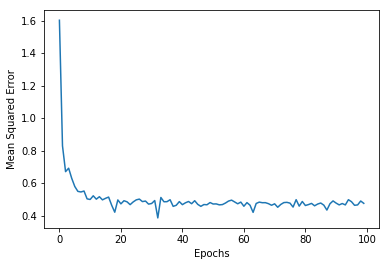

In [30]:
plt.plot(np.arange(len(list_MSE)), list_MSE)
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.show()